<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/Youtube_Global_Statistics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using kaggle
!pip install kaggle

In [ ]:
!kaggle datasets download -d nelgiriyewithana/global-youtube-statistics-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023
License(s): other
  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 77.6MB/s]


In [ ]:
import zipfile
zipfile_path = '/content/global-youtube-statistics-2023.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


#**Importing libraries and Loading the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import geopandas as gpd


In [ ]:
youtube = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin-1')

In [ ]:
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#**Overview of the data**

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
columns_to_drop = ['Abbreviation', 'created_month', 'created_date', 'Latitude', 'Longitude']
youtube.drop(columns=columns_to_drop, inplace=True)

In [ ]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population'],
      dtype='object')

In [ ]:
youtube['created_year'] = pd.to_datetime(youtube['created_year'])

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     995 non-null    int64         
 1   Youtuber                                 995 non-null    object        
 2   subscribers                              995 non-null    int64         
 3   video views                              995 non-null    float64       
 4   category                                 949 non-null    object        
 5   Title                                    995 non-null    object        
 6   uploads                                  995 non-null    int64         
 7   Country                                  873 non-null    object        
 8   channel_type                             965 non-null    object        
 9   video_views_rank                         99

In [ ]:
youtube.isnull().sum() / len(youtube) * 100

,0
rank,0.000000
Youtuber,0.000000
subscribers,0.000000
video views,0.000000
category,4.623116
Title,0.000000
uploads,0.000000
Country,12.261307
channel_type,3.015075
video_views_rank,0.100503


#**Data cleaning**

<Axes: >

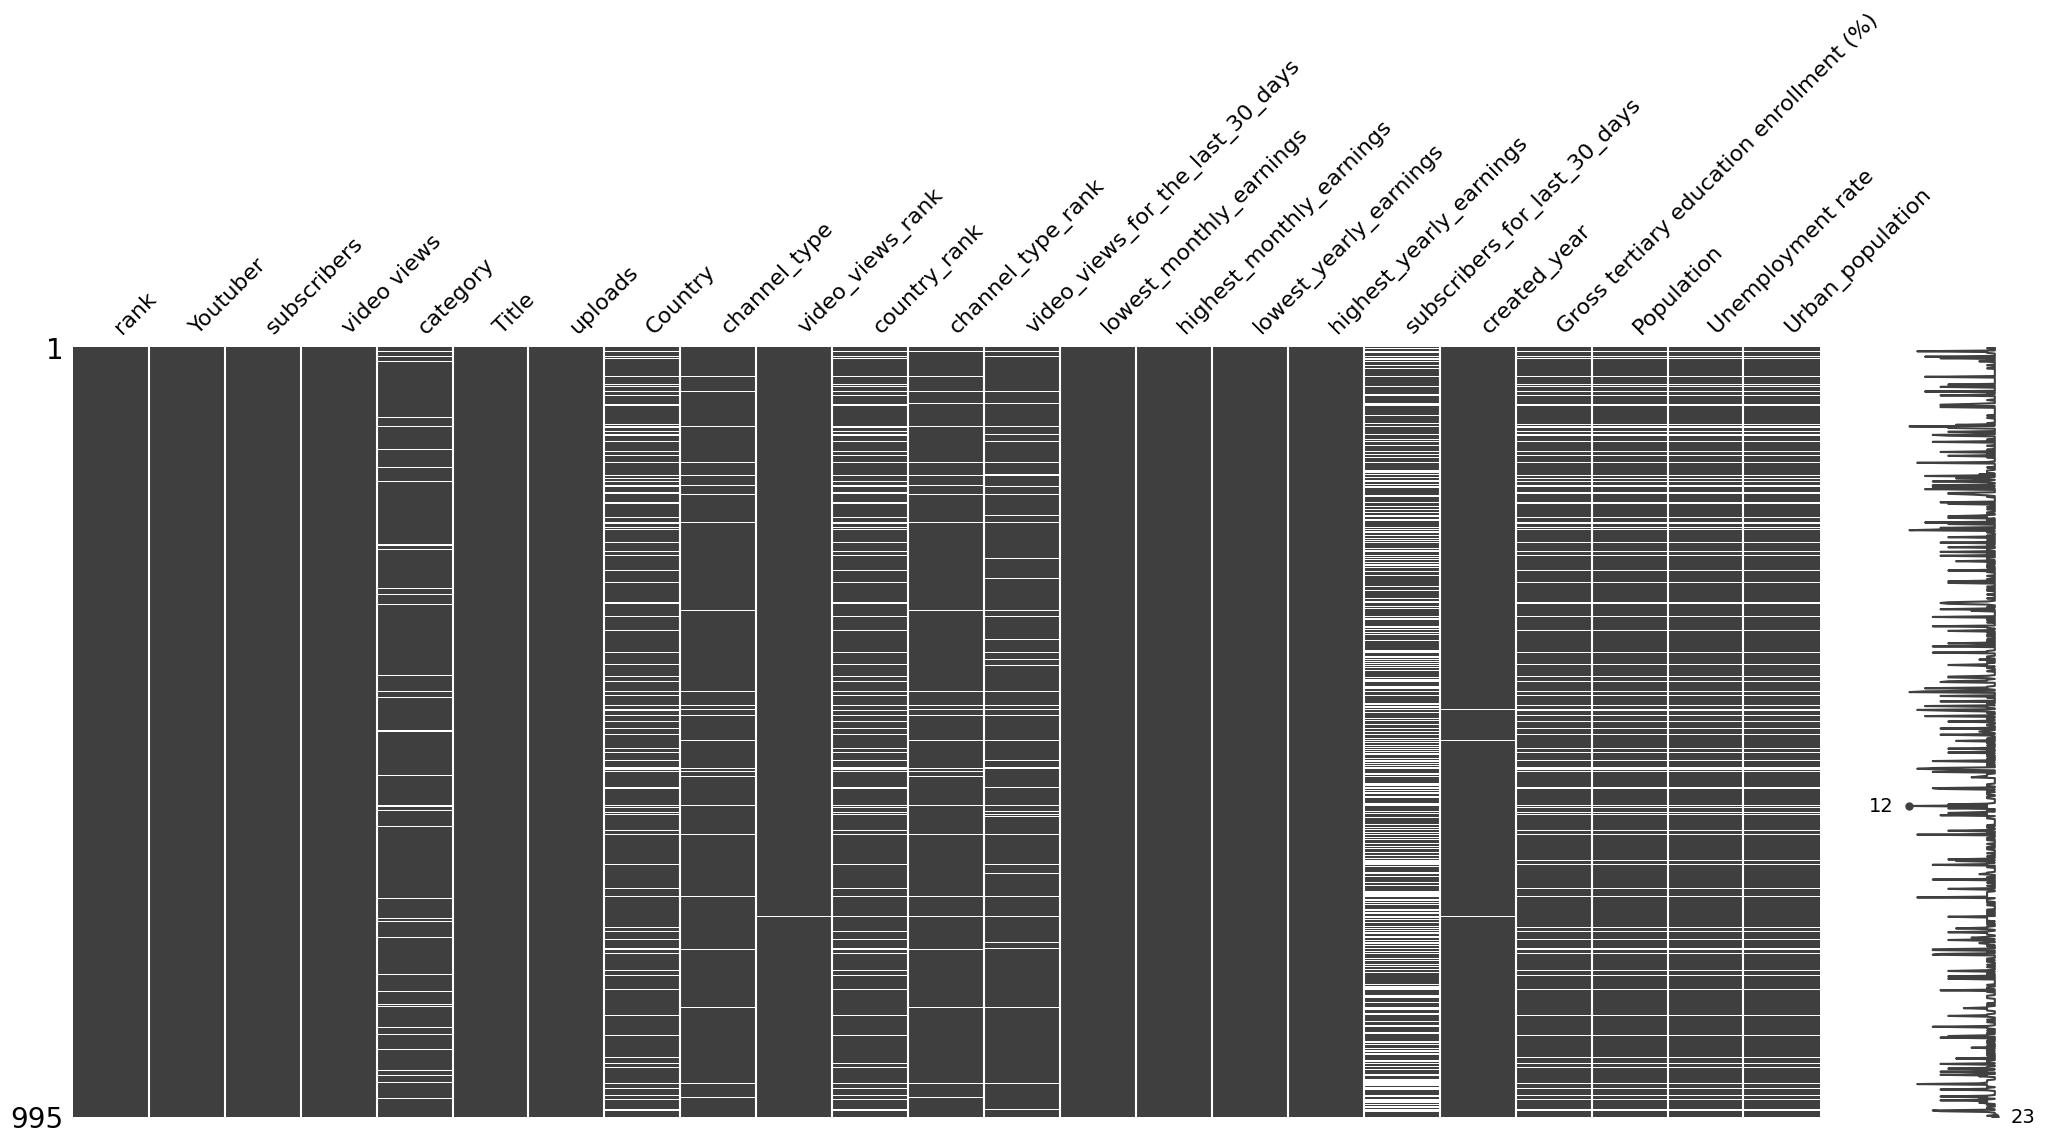

In [ ]:
msno.matrix(youtube)

**Dropping rows**

In [ ]:
columns_to_check = ['Country']
youtube = youtube.dropna(how='all', subset=columns_to_check)

In [ ]:
columns_to_check = ['created_year']
youtube = youtube.dropna(how='all', subset=columns_to_check)

In [ ]:
columns_to_check = ['channel_type_rank']
youtube = youtube.dropna(how='all', subset=columns_to_check)

In [ ]:
columns_to_check = ['Gross tertiary education enrollment (%)', 'Population','Unemployment rate', 'Urban_population']
youtube = youtube.dropna(how='all', subset=columns_to_check)

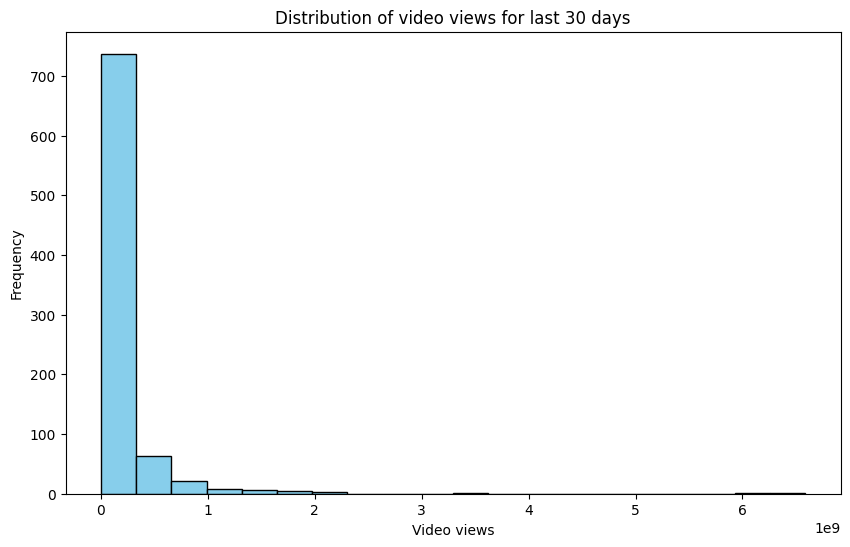

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(youtube['video_views_for_the_last_30_days'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of video views for last 30 days')
plt.xlabel('Video views')
plt.ylabel('Frequency')
plt.show()

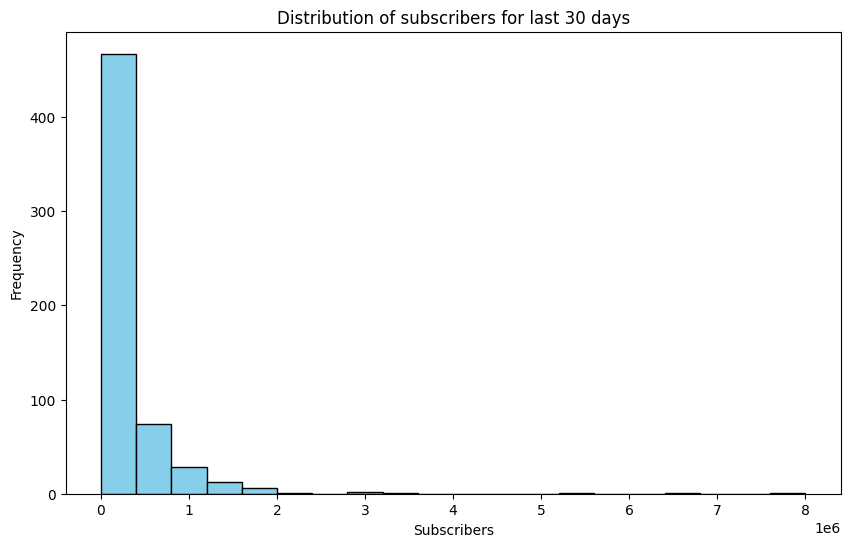

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(youtube['subscribers_for_last_30_days'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of subscribers for last 30 days')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

Filling missing data

In [ ]:
youtube['subscribers_for_last_30_days'].fillna(youtube['subscribers_for_last_30_days'].median(), inplace=True)

<ipython-input-22-2754c2caf9ff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['subscribers_for_last_30_days'].fillna(youtube['subscribers_for_last_30_days'].median(), inplace=True)


In [ ]:
youtube['video_views_for_the_last_30_days'].fillna(youtube['video_views_for_the_last_30_days'].median(), inplace=True)

<ipython-input-23-25e9fa20bcd1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['video_views_for_the_last_30_days'].fillna(youtube['video_views_for_the_last_30_days'].median(), inplace=True)


In [ ]:
youtube['channel_type'].fillna(youtube['channel_type'].mode()[0], inplace=True)

<ipython-input-24-0b0c7bc03d44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type'].fillna(youtube['channel_type'].mode()[0], inplace=True)


In [ ]:
youtube['category'].fillna(youtube['category'].mode()[0], inplace=True)

<ipython-input-25-2459b80587b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['category'].fillna(youtube['category'].mode()[0], inplace=True)


<Axes: >

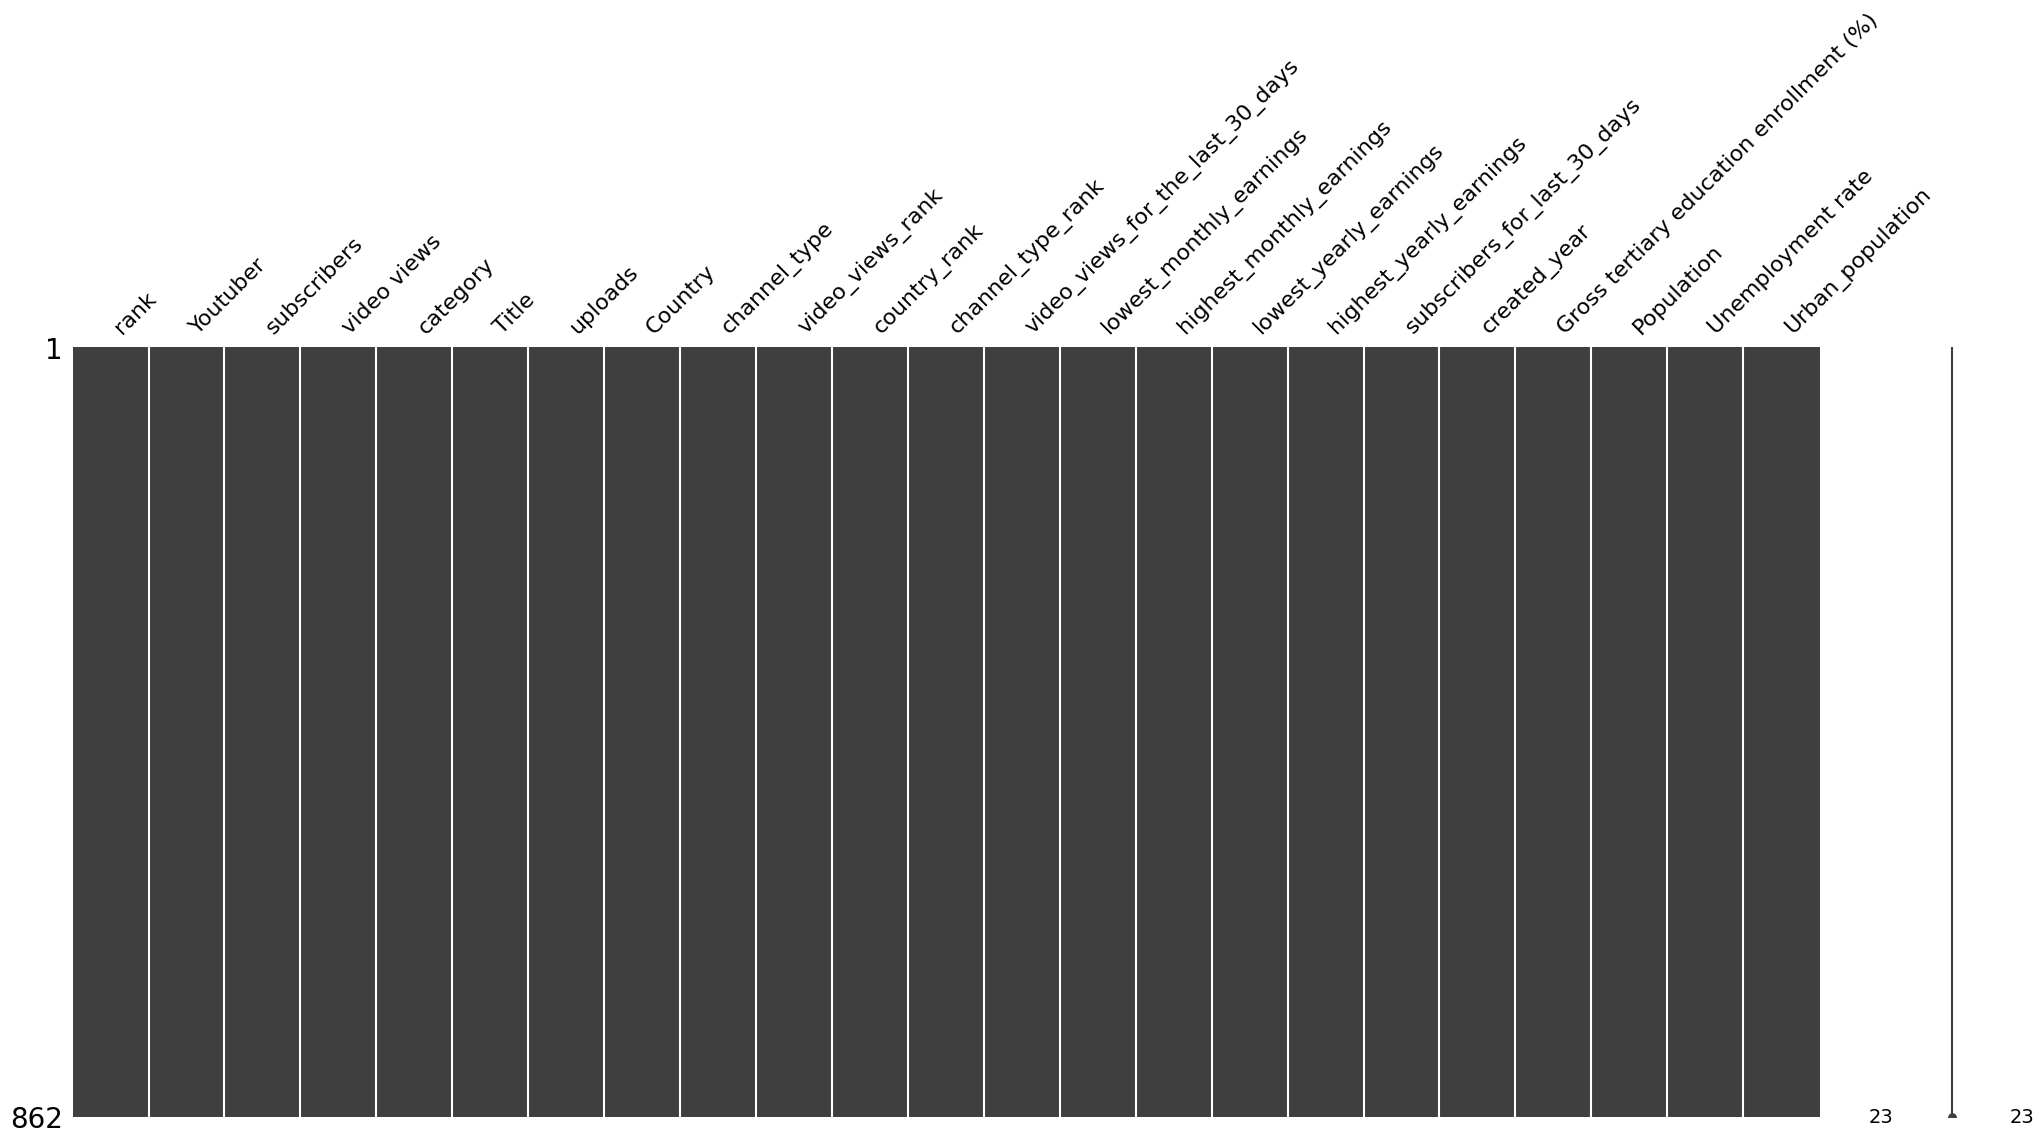

In [ ]:
msno.matrix(youtube)

In [ ]:
youtube.to_csv('youtube_cleaned.csv', index=False)

#**Data Analysis**
##**What factors affect Yotuber success?**


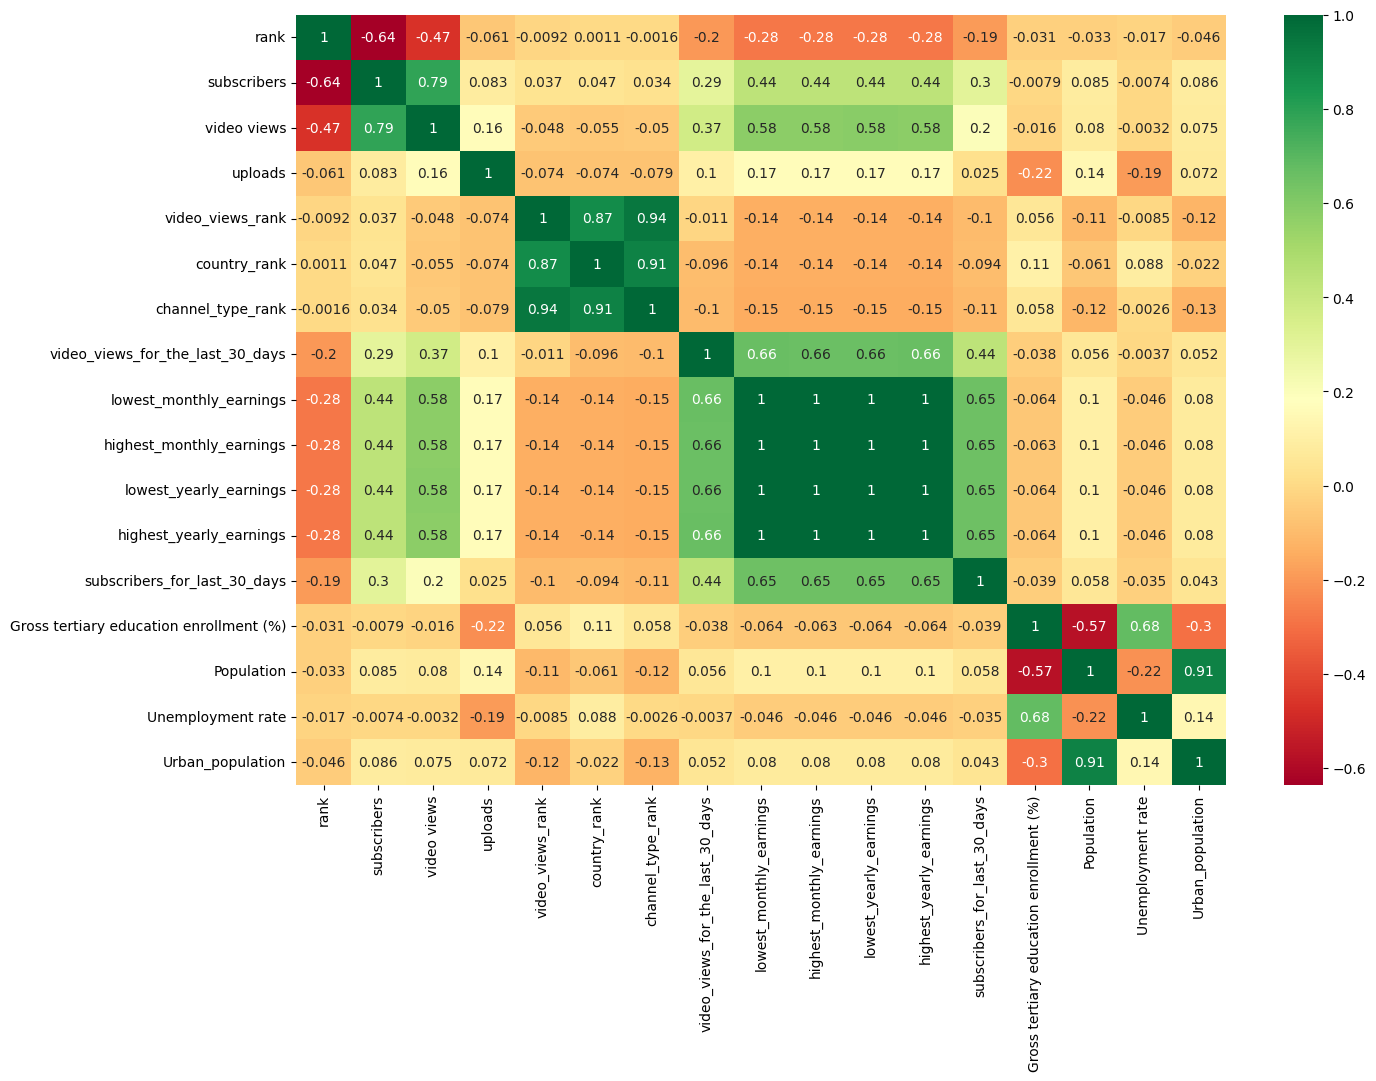

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(youtube.corr(numeric_only=True),annot=True,cmap='RdYlGn')
plt.show()

#**Overview of the most successful youtube channels**

In [ ]:
# Calculating mean video views for top 10 channels and filtering original data
top_channels = youtube.groupby('Youtuber')['video views'].mean().nlargest(10).index
data_top_channels = youtube[youtube['Youtuber'].isin(top_channels)].groupby(['Youtuber', 'category', 'subscribers'])['video views'].mean().reset_index()

# Sort the data by views in descending order
data_top_channels = data_top_channels.sort_values(by="video views", ascending=False)

fig = px.bar(data_top_channels, x="Youtuber", y="video views", title="Comparison of Top 10 Youtubers", hover_data=["category", "subscribers"])
fig.show()



The bar chart shows the Top 10 YouTube channels based on average video views, along with their categories. Categories like Shows, Music, and People & Blogs dominate, highlighting their popularity and high engagement. This suggests that these categories have strong potential for gaining subscribers. The variety of categories represented also shows the broad appeal of different types of content to viewers.

## Comparing the average views per video for top 10 Youtubers

In [ ]:
# Filter the top 10 channels by 'rank'
top_10_df = youtube.sort_values(by='rank').head(10)
# Calculate the average views per upload
top_10_df['views_per_upload'] = top_10_df['video views'] / top_10_df['uploads']
# Plot using Plotly
fig = px.bar(top_10_df, x='Youtuber', y='views_per_upload', title='Average Video Views per Upload for Top 10 YouTube Channels',
    labels={'views_per_upload': 'Average Views per Upload', 'Youtuber': 'Channel'}, text='views_per_upload'
)
# Customize the plot layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis=dict(title='Average Views per Upload'), xaxis=dict(title='Channel'), showlegend=False
)
fig.show()

This distribution shows the average views per video for top 10 Youtubers.
Top YouTubers like Cocomelon, MrBeast, and Like Nastya get higher average views per video by focusing on fewer, high-quality, engaging videos that are more likely to go viral and be replayed. In contrast, channels like T-Series and SET India prioritize frequent uploads to boost total views and subscribers but see fewer views per video due to the sheer volume of content. This highlights a key lesson for creators: focusing on quality and unique, engaging content can lead to higher average views, while high-volume strategies may prioritize overall reach over per-video performance.

# **Analyzing the relationship between subscriber counts and video views**

In [ ]:
fig = px.scatter(youtube, x="subscribers", y="video views", hover_data=['Youtuber', 'category'], trendline='ols')
fig.show()

This scatter plot explores the relationship between subscribers and video views, showing a strong positive correlation (0.79 as indicated in the correlation matrix). This means more subscribers often lead to higher views, so YouTubers should focus on growing their subscriber base to boost engagement.
Outliers like YouTube Movies (with 0 views but 170M subscribers) may indicate inactive channels, while T-Series (Music category) shows success, since music videos tend to be short, viral music videos attract high views and retain audiences.
For creators, categories with fewer subscribers but high views offer opportunities to reach broader audiences. Categories with both high subscribers and views may be more competitive but also promise strong growth and monetization potential.

# **Bar charts of average video views and subscriber counts in each category**
These metrics may be important to content creators who would like to venture into YouTube or who are already on the platform and would like to increase their engagement.

In [ ]:
# Calculate the mean views for each category and sort them in descending order
category_mean_views = youtube.groupby('category')['subscribers'].mean().sort_values(ascending=False)

# Filter the dataset for all categories and sort it by the calculated mean views
data_categories = youtube[youtube['category'].isin(category_mean_views.index)].copy()

# Create the histogram with categories sorted in descending order of mean views
fig = px.histogram(data_categories, x="category", y=["subscribers"], height=400, title="Comparison of Categories by Average Subscriber Count",histfunc="avg")
fig.update_layout(xaxis={'categoryorder': 'array','categoryarray': category_mean_views.index.tolist()})
fig.show()



The bar chart compares average subscriber counts across different YouTube categories. The top categories, like Shows, Trailers, and Film & Animation, attract the most subscribers, therefore dominating the platform.
Categories with fewer subscribers, such as Travel & Events, Autos & Vehicles, and Science & Technology, cater to niche interests but may have highly engaged audiences.
Broad categories tend to appeal to larger audiences, while niche categories offer opportunities for creators to build loyal, focused communities. Creators can either aim for wide-reaching content to grow quickly or specialize in a niche for dedicated followers.

In [ ]:
# Calculate the mean views for each category and sort them in descending order
category_mean_views = youtube.groupby('category')['video views'].mean().sort_values(ascending=False)

# Filter the dataset for all categories and sort it by the calculated mean views
data_categories = youtube[youtube['category'].isin(category_mean_views.index)].copy()

# Create the histogram with categories sorted in descending order of mean views
fig = px.histogram(data_categories, x="category", y=["video views"], height=400, title="Comparison of Categories by Average Video Views",histfunc="avg")
fig.update_layout(xaxis={'categoryorder': 'array','categoryarray': category_mean_views.index.tolist()})
fig.show()



The bar chart shows average video views across YouTube categories. The top categories—Shows, Trailers, and Education—are the most popular and have high engagement. Lower-view categories like Travel & Events, Science & Technology, and How-to & Style attract fewer views and cater to niche audiences.
Broad categories with more views appeal to larger audiences, while categories with fewer views may offer opportunities for creators to innovate and stand out. High-view categories can provide insights into successful content trends, while low-view categories might be ideal for a youtuber intending to carve out a unique niche.

#**Analyzing different earning potentials depending on the categories**

In [ ]:
# Define factors and plot in a loop
for factors in [['lowest_monthly_earnings', 'highest_monthly_earnings']]:
    new_data = youtube[['category'] + factors].melt(id_vars='category', var_name='Factor', value_name='Value')
    fig = px.histogram(new_data, x="category", y="Value", color="Factor", barmode="group",
                       height=400, title="Comparison of monthly earnings for different categories", histfunc="avg")
    fig.show()

for factors in [['lowest_yearly_earnings', 'highest_yearly_earnings']]:
    new_data = youtube[['category'] + factors].melt(id_vars='category', var_name='Factor', value_name='Value')
    fig = px.histogram(new_data, x="category", y="Value", color="Factor", barmode="group",
                       height=400, title="Comparison of yearly earnings for different categories", histfunc="avg")
    fig.show()


This distribution shows how YouTuber earnings vary across categories. High-earning categories like Shows are lucrative for creators at all levels, while low-earning categories like Travel & Events may have limited monetization opportunities due to their smaller audiences.
Interestingly, popular categories like Trailers, despite having high engagement, show lower earnings, possibly due to lower CPM rates or monetization challenges. The wide gap between lowest and highest earnings indicates that a creator’s income often depends on their popularity. This helps creators understand which categories offer better earning potential and can guide them in choosing their niche.

# **Top Countries with the most popular Youtube channels**

In [ ]:
country_counts = youtube['Country'].value_counts().reset_index() # Group by 'Country'
country_counts.columns = ['Country', 'Channel Count'] # count the number of channels

# Sort the countries by the count of channels in descending order
country_counts_sorted = country_counts.sort_values(by='Channel Count', ascending=False)
top_20_countries = country_counts_sorted.head(20) # Select the top 10 countries

fig = px.bar(top_20_countries, x='Country', y='Channel Count', title='Top Countries with the Most Popular YouTube Channels',
    labels={'Channel Count': 'Number of Channels', 'Country': 'Country'}, text='Channel Count')
# Customize the plot appearance
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(yaxis=dict(title='Number of Channels'), xaxis=dict(title='Country'), showlegend=False)
fig.show()


Countries like the USA, India, Brazil, UK, Mexico, and Indonesia dominate YouTube with many popular channels due to factors like large populations, high smartphone and internet use, and affordable data. Localization and support for multiple languages makes YouTube accessible worldwide, while strong creator programs in places like the USA and India help creators grow. Many of these countries have young audiences who prefer YouTube over traditional media for entertainment, education, and tutorials. When picking a niche, YouTubers should consider factors like audience size, cultural preferences, language, and monetization opportunities in top markets like the USA, India, and Brazil. Tailoring their content to these areas and appealing to youthful demographics or tapping into popular trends can also help grow their channels and maximize revenue.